In [1]:
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer, DataCollatorForSeq2Seq

/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = "cnn_dailymail"
seed_num = 1
model_name = "google-t5/t5-small"

In [4]:
loaded_dataset = load_dataset(dataset, '3.0.0')

In [5]:
loaded_dataset
# make the dataset into a pandas dataframe
# df = pd.DataFrame(loaded_dataset['train'])
# # add the test dataset to the dataframe
# df = pd.concat([df, pd.DataFrame(loaded_dataset['test'])], ignore_index=True)

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [6]:
# Tokenize the summary column
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [7]:
prefix = "summarize: "  # Required so the T5 model knows that we are going to summarize
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs)
    labels = tokenizer(text_target=examples["highlights"])
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)
tokenized_dataset = loaded_dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 11490/11490 [00:09<00:00, 1227.36 examples/s]


In [9]:
# Make the dataset into a Dataframe
df = pd.DataFrame(tokenized_dataset['train'])
df.tail()

,article,highlights,id,input_ids,attention_mask,labels
287108,"The nine-year-old daughter of a black, unarmed...","Rumain Brisbon, 34, was killed after Phoenix p...",279a12d3ee37b8109cc192a9e88115a5a631fb06,"[21603, 10, 37, 4169, 18, 1201, 18, 1490, 3062...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2770, 7484, 7834, 7, 5407, 6, 6154, 6, 47, 47..."
287109,Legalising assisted suicide is a slippery slop...,"Theo Boer, a European assisted suicide watchdo...",b5bc9d404a9a5d890c9fc26550b67e6d8d83241f,"[21603, 10, 11281, 4890, 11752, 12259, 19, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[37, 32, 1491, 49, 6, 3, 9, 1611, 11752, 12259..."
287110,A group calling itself 'The Women of the 99 Pe...,Ohio congressman criticised for 'condoning the...,500862586f925e406f8b662934e1a71bbee32463,"[21603, 10, 71, 563, 3874, 1402, 3, 31, 634, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6167, 27197, 348, 6800, 3375, 21, 3, 31, 1018..."
287111,Most men enjoy a good pint of lager or real al...,The Black Country Ale Tairsters have been to 1...,32a1f9e5c37a938c0c0bca1a1559247b9c4334b2,"[21603, 10, 1377, 1076, 777, 3, 9, 207, 4522, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[37, 1589, 6993, 15345, 332, 2256, 1370, 7, 43..."
287112,A Facebook page seeking to preserve the 'Black...,Facebook page supporting tradition gains one m...,8ec9ff4d633dd4cc26d53f503c33f7464b43c36e,"[21603, 10, 71, 1376, 543, 3945, 12, 8996, 8, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1376, 543, 3956, 4387, 11391, 80, 770, 3, 31,..."


In [11]:
from pprint import pprint
pprint(df['article'][0])

('LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access '
 'to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, '
 "but he insists the money won't cast a spell on him. Daniel Radcliffe as "
 'Harry Potter in "Harry Potter and the Order of the Phoenix" To the '
 'disappointment of gossip columnists around the world, the young actor says '
 'he has no plans to fritter his cash away on fast cars, drink and celebrity '
 'parties. "I don\'t plan to be one of those people who, as soon as they turn '
 '18, suddenly buy themselves a massive sports car collection or something '
 'similar," he told an Australian interviewer earlier this month. "I don\'t '
 'think I\'ll be particularly extravagant. "The things I like buying are '
 'things that cost about 10 pounds -- books and CDs and DVDs." At 18, '
 'Radcliffe will be able to gamble in a casino, buy a drink in a pub or see '
 'the horror film "Hostel: Part II," currently six places below his number

In [12]:
# Give me the percentiles of length of input_ids using pandas and plot them
df['input_ids'].apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    287113.000000
mean        985.055038
std         480.603123
min          20.000000
25%         631.000000
50%         898.000000
75%        1244.000000
90%        1659.000000
95%        1947.000000
99%        2405.000000
max        5269.000000
Name: input_ids, dtype: float64

In [13]:
# The same for the labels
df['labels'].apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    287113.000000
mean         74.682811
std          30.752373
min           7.000000
25%          55.000000
50%          70.000000
75%          87.000000
90%         110.000000
95%         129.000000
99%         171.000000
max        3151.000000
Name: labels, dtype: float64

# Trainer

In [1]:
import torch
from transformers import AutoTokenizer, DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import load_dataset
import evaluate
from torchmetrics.text.bert import BERTScore
from evaluate import load
from torchmetrics.text.rouge import ROUGEScore
import numpy as np
import wandb
import os
from icecream import ic
wandb.require("core")

# Parameters for the rest of the script
optimizer_name = "adam"
model_name = "google-t5/t5-small"
dataset =   "cnn_dailymail"
seed_num = 1
max_length = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wandb_run_name = f"{optimizer_name}-{dataset}-{model_name.split('-')[1].split('/')[0]}"
output_dir = f"{optimizer_name}/{dataset}/{model_name.split('-')[1].split('/')[0]}"


# Main
# Load the T5 model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Dataset
loaded_dataset = load_dataset(dataset, '3.0.0')
# loaded_dataset = loaded_dataset.train_test_split(test_size=0.2, seed=seed_num, shuffle=True)
train = loaded_dataset['train'].select(range(1, 200)) # Train Dataset 80%
temp = loaded_dataset['test'].select(range(1, 200)).train_test_split(test_size=0.5)  # Ignore
test = temp['test'] # Test Dataset
val = temp['train'] # Val Dataset

ic(len(train))
ic(len(val))
ic(len(test))

# Load evaluation
rouge = ROUGEScore(use_stemmer=True)
bert_score = BERTScore(device=device)
# bert_score = load("bertscore")

prefix = "summarize: "  # Required so the T5 model knows that we are going to summarize
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=max_length, truncation=True)
    labels = tokenizer(text_target=examples["highlights"], max_length=max_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)
tokenized_dataset_train = train.map(preprocess_function, batched=True)
tokenized_dataset_val = val.map(preprocess_function, batched=True)
tokenized_dataset_test = test.map(preprocess_function, batched=True)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result_rouge = rouge(preds=decoded_preds, target=decoded_labels)
    result_brt = bert_score(preds=decoded_preds, target=decoded_labels)
    result_brt_average_values = {key: tensors.mean().item() for key, tensors in result_brt.items()}
    results = {**result_rouge, **result_brt_average_values}
    return results

def get_optimizer(optimizer_name, model, learning_rate):
    if optimizer_name == "adamw":
        return torch.optim.AdamW(model.parameters(), lr=learning_rate)
    elif optimizer_name == "sgd":
        return torch.optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == "adam":
        return torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,
    logging_strategy="steps",
    eval_strategy="steps",
    logging_steps = 20,
    eval_steps =20,
    learning_rate=2e-5,
    weight_decay=0.01,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    # save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    seed=seed_num,
    data_seed=seed_num,
    fp16=False,
    push_to_hub=False,
    report_to="wandb",
    run_name=wandb_run_name,
    load_best_model_at_end = True,
    metric_for_best_model = 'loss',
)

class CustomTrainer(Seq2SeqTrainer):
    def create_optimizer(self):
        self.optimizer = get_optimizer(optimizer_name, self.model, self.args.learning_rate)
        print(f"\nOptimizer: {self.optimizer.__class__.__name__} with name: {optimizer_name} was created.\n")

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_train,
    eval_dataset=tokenized_dataset_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Example usage
if __name__ == "__main__":
    trainer.train()

/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ic| len(train): 199
ic| len(val): 99
ic| len(test): 100
/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: The argument `model_name_or_path` was not specified while it is required when the default `transformers` model is used. It will use the default recommended model - 'roberta-large'.
  warnings.warn(*args, **kwargs)  # noqa: B028
/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 10


Optimizer: Adam with name: adam was created.



wandb: Currently logged in as: pavlospoulos (pavlos_poulos). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Rouge1 Fmeasure,Rouge1 Precision,Rouge1 Recall,Rouge2 Fmeasure,Rouge2 Precision,Rouge2 Recall,Rougel Fmeasure,Rougel Precision,Rougel Recall,Rougelsum Fmeasure,Rougelsum Precision,Rougelsum Recall,Precision,Recall,F1
20,2.615400,2.540219,0.242623,0.413168,0.176543,0.092289,0.157918,0.066812,0.198366,0.337661,0.144396,0.220622,0.375273,0.160574,0.962894,0.953787,0.958302
40,2.591800,2.500165,0.245461,0.419882,0.178369,0.093790,0.161489,0.067783,0.202886,0.346387,0.147604,0.223479,0.381626,0.162504,0.962990,0.953780,0.958346


/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
results = trainer.predict(tokenized_dataset_test)

/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
results[2]

{'test_loss': 2.4009511470794678,
 'test_rouge1_fmeasure': 0.24885646998882294,
 'test_rouge1_precision': 0.4333604574203491,
 'test_rouge1_recall': 0.17930950224399567,
 'test_rouge2_fmeasure': 0.08461087197065353,
 'test_rouge2_precision': 0.1504550576210022,
 'test_rouge2_recall': 0.060310978442430496,
 'test_rougeL_fmeasure': 0.19637919962406158,
 'test_rougeL_precision': 0.3421281576156616,
 'test_rougeL_recall': 0.14131340384483337,
 'test_rougeLsum_fmeasure': 0.22376030683517456,
 'test_rougeLsum_precision': 0.39116519689559937,
 'test_rougeLsum_recall': 0.16092655062675476,
 'test_precision': 0.9636220335960388,
 'test_recall': 0.9535024166107178,
 'test_f1': 0.9585170149803162,
 'test_runtime': 10.9564,
 'test_samples_per_second': 9.127,
 'test_steps_per_second': 2.282}

In [17]:
# Test the model and save results in file and wandb
def test_model():
    results = trainer.predict(tokenized_dataset_test)
    metrics = results[2]
    
    # Optionally, save metrics to a file as well
    with open(f"{output_dir}/results.txt", "w") as f:
        f.write("\n".join([f"{metric} : {value}" for metric, value in metrics.items()]))

    trainer.log_metrics("test", metrics)

test_model()

/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


***** test metrics *****
  test_f1                  =     0.9585
  test_loss                =      2.401
  test_precision           =     0.9636
  test_recall              =     0.9535
  test_rouge1_fmeasure     =     0.2489
  test_rouge1_precision    =     0.4334
  test_rouge1_recall       =     0.1793
  test_rouge2_fmeasure     =     0.0846
  test_rouge2_precision    =     0.1505
  test_rouge2_recall       =     0.0603
  test_rougeL_fmeasure     =     0.1964
  test_rougeL_precision    =     0.3421
  test_rougeL_recall       =     0.1413
  test_rougeLsum_fmeasure  =     0.2238
  test_rougeLsum_precision =     0.3912
  test_rougeLsum_recall    =     0.1609
  test_runtime             = 0:00:10.40
  test_samples_per_second  =      9.612
  test_steps_per_second    =      2.403


# Filter datasets for length

In [1]:
import torch
from transformers import AutoTokenizer, DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import load_dataset
import evaluate
from torchmetrics.text.bert import BERTScore
from evaluate import load
from torchmetrics.text.rouge import ROUGEScore
import numpy as np
import wandb
import os
from icecream import ic
wandb.require("core")

# Parameters for the rest of the script
optimizer_name = "adam"
model_name = "google-t5/t5-small"
dataset =   "cnn_dailymail"
seed_num = 1
max_length = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wandb_run_name = f"{optimizer_name}-{dataset}-{model_name.split('-')[1].split('/')[0]}"
output_dir = f"{optimizer_name}/{dataset}/{model_name.split('-')[1].split('/')[0]}"


# Main
# Load the T5 model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Dataset
loaded_dataset = load_dataset(dataset, '3.0.0')
# loaded_dataset = loaded_dataset.train_test_split(test_size=0.2, seed=seed_num, shuffle=True)
train = loaded_dataset['train'] # Train Dataset 80%
temp = loaded_dataset['test'].train_test_split(test_size=0.5)  # Ignore
test = temp['test'] # Test Dataset
val = temp['train'] # Val Dataset

ic(len(train))
ic(len(val))
ic(len(test))

# Load evaluation
rouge = ROUGEScore(use_stemmer=True)
bert_score = BERTScore(device=device)
# bert_score = load("bertscore")

prefix = "summarize: "  # Required so the T5 model knows that we are going to summarize
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs)
    labels = tokenizer(text_target=examples["highlights"])
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)
tokenized_dataset_train = train.map(preprocess_function, batched=True).filter(lambda x: len(x['input_ids']) <= max_length).select(range(1, 200)
tokenized_dataset_val = val.map(preprocess_function, batched=True).filter(lambda x: len(x['input_ids']) <= max_length)
tokenized_dataset_test = test.map(preprocess_function, batched=True).filter(lambda x: len(x['input_ids']) <= max_length)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff384aac290>>
Traceback (most recent call last):
  File "/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
/home/ppoulos/miniconda3/envs/pavlosEnv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
tokenized_dataset_val

Dataset({
    features: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1022
})

In [66]:
import pandas as pd
df = pd.DataFrame(tokenized_dataset_val)
df['input_ids'].apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1022.000000
mean      390.675147
std        84.524841
min        75.000000
25%       329.000000
50%       404.000000
75%       461.750000
90%       491.000000
95%       500.950000
99%       509.790000
max       512.000000
Name: input_ids, dtype: float64

<Axes: >

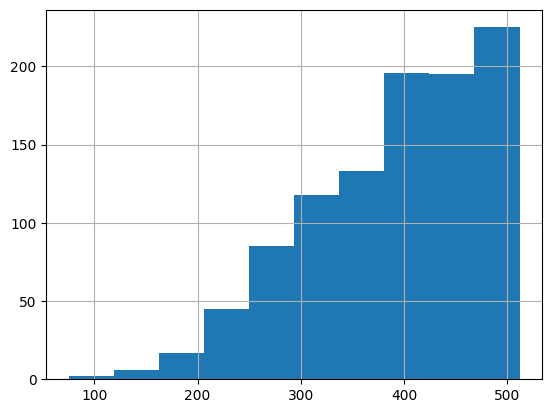

In [67]:
df['input_ids'].apply(len).hist()

In [68]:
df['labels'].apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1022.000000
mean       65.250489
std        20.012823
min        19.000000
25%        52.000000
50%        63.000000
75%        76.000000
90%        90.000000
95%       102.000000
99%       127.790000
max       170.000000
Name: labels, dtype: float64

In [70]:
trainer.save_model(output_dir)